In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
import os
from datetime import datetime
matplotlib.rc('font', family='D2coding')

In [ ]:
df_order = pd.read_csv('E:/User/Documents/posco-academy/data/log_order_sheet_000.csv', encoding= 'utf-8')
df_member = pd.read_csv('E:/User/Documents/posco-academy/data/master_member_sheet_000.csv', encoding= 'utf-8')
df_member['나이']

0       45
1       53
2       28
3       44
4       40
        ..
6570    31
6571    45
6572    47
6573    46
6574    47
Name: 나이, Length: 6575, dtype: int64

<AxesSubplot:ylabel='None'>

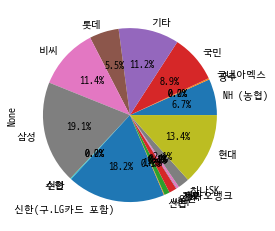

In [ ]:
df_order.groupby(['카드사']).size().plot.pie(autopct = '%0.1f%%')

In [ ]:
df_order['배송기간'] = df_order['배송시작일']

for i in range(len(df_order['주문일시'])):

    payment_list = str(df_order['결제수단'][i]).split(',')

    if '적립금' in payment_list:
        payment_list.remove('적립금')
    if '예치금' in payment_list:
        payment_list.remove('예치금')
    if '쿠폰' in payment_list:
        payment_list.remove('쿠폰')

    df_order['결제수단'][i] = ','.join(payment_list)
    df_order['주문일시'][i] = datetime.strptime(df_order['주문일시'][i].replace('오전', 'AM').replace('오후','PM'), '%Y-%m-%d %p %I:%M')
    df_order['배송시작일'][i] = datetime.strptime(df_order['배송시작일'][i].replace('오전', 'AM').replace('오후','PM'), '%Y-%m-%d %p %I:%M')
    df_order['배송기간'][i] = int(str(df_order['배송시작일'][i] - df_order['주문일시'][i])[0])

In [ ]:
df = df_order.drop(['교환구분','배송번호','배송비 정보','상품명','주문 시 회원등급','주문번호','주문자ID','카드사','품목번호','쿠폰 할인금액'], axis = 1)

In [ ]:
df.mean()

공급원가          40845.938471
네이버 포인트          75.136623
사용한 적립금액        845.446983
상품구매금액        69368.144452
상품번호            763.193073
상품별 추가할인금액     8624.497636
수량                1.177822
판매가           58161.771268
배송기간              2.736144
dtype: float64

In [ ]:
df.isna().sum()

결제수단           0
공급원가          88
네이버 포인트        0
배송시작일          0
배송완료일          0
사용한 적립금액       0
상품구매금액         0
상품번호          88
상품별 추가할인금액     0
수량             0
수령인 주소         8
주문경로           0
주문일시           0
판매가            0
배송기간           0
dtype: int64

In [ ]:
df.dropna(subset=['공급원가'],inplace=True)

상품 구매 금액 = 판매가 x 수량

순이익? = 상품구매금액 - (판매가-공급원가)*수량

<AxesSubplot:ylabel='None'>

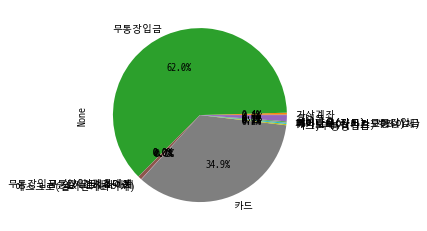

In [ ]:
df.groupby(['결제수단']).size().plot.pie(autopct = '%0.1f%%')

<AxesSubplot:>

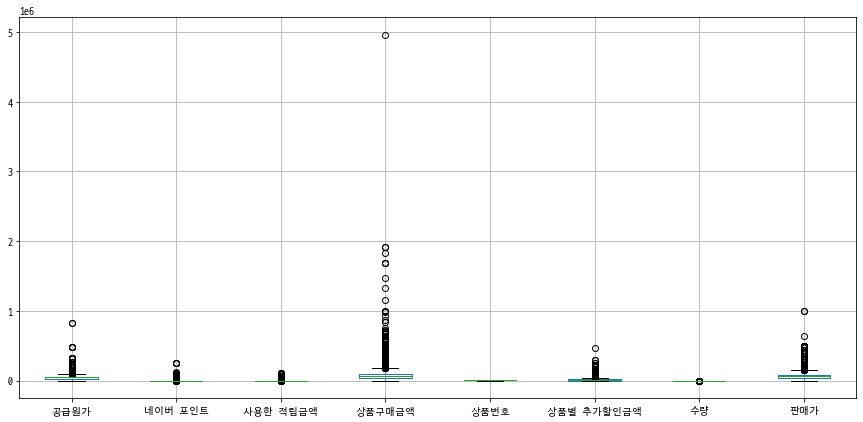

In [ ]:
df.boxplot(figsize=(15,7))

<AxesSubplot:ylabel='None'>

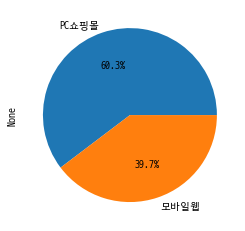

In [ ]:
df['주문경로'] = np.where(df['주문경로'] == '모바일웹', '모바일웹', 'PC쇼핑몰')

df.groupby(['주문경로']).size().plot.pie( autopct = '%0.1f%%')

24512    4963400
20642    1920000
31697    1916750
29160    1825800
33126    1691250
          ...   
37119          0
22594          0
37123          0
29365          0
26684          0
Name: 상품구매금액, Length: 46661, dtype: int64


<AxesSubplot:>

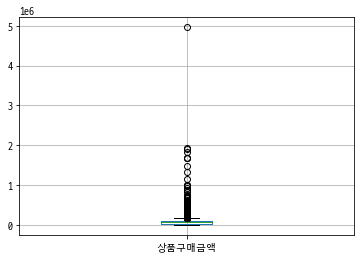

In [ ]:
print(df['상품구매금액'].sort_values(ascending = False))
df.boxplot('상품구매금액')

특이값을 어떻게 할 것인지 정해야함

# product 

In [ ]:
df_product = pd.read_csv('E:/User/Documents/posco-academy/data/master_product_sheet_000.csv', encoding= 'utf-8')

<AxesSubplot:>

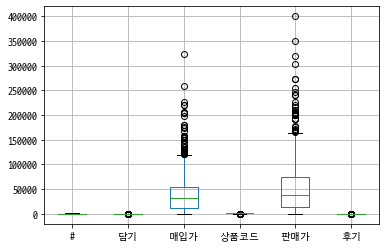

In [ ]:
df_product.boxplot()

In [ ]:
df_p = df_product['카테고리']

category_set = set()

for p in df['상품번호']:
    if df_product[df_product['상품코드']== int(p)] is not None:
        
        for i in df_product[df_product['상품코드']== int(p)]['카테고리']:
            for x in i.split('\n'):
                if '카달로그' not in x.split(' ')[-1] and 'NEW' not in x.split(' ')[-1]:
                    category_set.add(x.split(' ')[-1])




{'190(195)파이',
 '1칸',
 '2319(2318)시리즈',
 'BEST상품',
 'Catalogue',
 'SALE',
 '기타',
 '도마',
 '도시락용기',
 '도시락용기/직화용기',
 '떡/반찬용기',
 '뚜껑',
 '랩칼',
 '면/볶음밥용기',
 '면용기',
 '물엿/당류',
 '반찬/소스',
 '반찬용기',
 '분식용기',
 '비닐봉투',
 '비닐장갑',
 '빨대',
 '빨대/커피스틱',
 '사각용기',
 '샐러드/도시락용기',
 '샐러드/야채/반찬용기',
 '샐러드용기',
 '생수/쥬스/더치커피용기',
 '소량',
 '소스/국/밥용기',
 '스트로폼용기',
 '스푼/포크/나이프',
 '식기',
 '식자재',
 '식재료',
 '실링기계',
 '실링용기',
 '실링제품',
 '실링특대형',
 '실링필름',
 '실링필름/랩칼',
 '아이스컵',
 '양념통세트',
 '요리접시/탕/찜',
 '용기',
 '원형접시',
 '음식종류별',
 '일회용품',
 '임시카테고리',
 '종이컵/아이스컵/뚜껑',
 '주방용품',
 '주방용품/소모품',
 '주방잡화',
 '죽',
 '죽용기',
 '직화용기',
 '찌개',
 '찜용기',
 '초밥/도시락용기/직화용기',
 '칸나눔용기',
 '컵캐리어/컵홀더',
 '쿠키/샌드위치/빵용기',
 '탕/면/찌개용기',
 '탕/찜/면용기/회접시',
 '탕/찜/죽/면용기',
 '탕용기',
 '파우더',
 '펄프용기',
 '한식',
 '회접시'}

In [ ]:
len(category_set)

70